In [1]:
%matplotlib inline

In [2]:
import numpy as np

### Exploring ratio.py module

In [3]:
# Generate random samples
np.random.seed(1984)
T1 = np.random.normal(loc=14.0, scale=3.0, size=6)
T2 = np.random.normal(loc=7.0, scale=2.0, size=6)

In [4]:
from dcstats.ratio import Ratio

In [5]:
rt = Ratio(T1, T2)
rt.run_bootstrap(50000)
print(rt)


Ratio = 1.87 +/- 0.17 (approximate SDM)
	approximate 95% confidence limits:
	lower= 1.5; upper= 2.24
	Fieller 95% confidence limits:
	lower= 1.44; upper= 2.49

Bootsrapping statistics (repeats = 50000):
Ratio= 1.87 +/- 0.21 (bootstrapped SDM); bias= -0.014
	95% confidence limits (bootstrapped):
	lower= 1.53; upper= 2.35


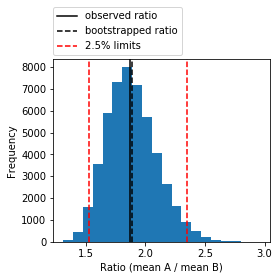

In [6]:
fig = rt.plot_bootstrap()

#### Compare to GraphPad calculator results

In [7]:
print('meanA =', rt.meanA, '; meanB =', rt.meanB)
print('sdA =', rt.sdA, ';sdB =', rt.sdB)

meanA = 13.8156018784828 ; meanB = 7.373761350516429
sdA = 2.5318571014924607 ;sdB = 1.7214705715414245


Following are results from GraphPad calculator:   
https://www.graphpad.com/quickcalcs/errorProp2/

 CI of a quotient

Mean of Variable A divided by Mean of Variable B = 1.873616628169721 

95% CI: 	1.436957351945638 	to 	2.487248647961153 

These results assume that both variables follow a Gaussian distribution
and that the measurements of Variable A are not paired or matched to
measurements of Variable B.

Results computed by the method of EC Fieller, Suppl to
J.R.Statist.Soc, 7,1-64

Wikipedia:   https://en.wikipedia.org/wiki/Fieller%27s_theorem

##### Old fieller.py module (supperseeded by ratio.py)

FIELLER: calculates confidence limits for a ratio according Fieller's theorem. Output includes the approximate SD of the ratio r = a / b, given the SD of a (the numerator) and of b (the denominator) and the correlation coefficient between a & b (zero if they are independent). 
Fieller requires the t-statistic which is calculated from alpha and the degrees of freedom. Alpha is taken as for two-tailed t-distribution ution (e.g. 0.05 leaves 95% area: limits calculated at 2.5% and 97.5%).

In [8]:
from dcstats.fieller import Fieller

In [9]:
a, b = 14, 7 # Nominator and denominator
sa, sb = 3, 2 # SD of nominator and denominator
r = 0 # Correlation coefficient (a,b)
alpha = 0.05 # alpha
n = 12 # Total number of observations na + nb

In [10]:
flr = Fieller(a, b, sa, sb, r, alpha, n)
print(flr)


 Fieller calculation result: 
 Ratio (a/b) = 2.000000
 t(df=10, alpha=0.05) = 2.228138

 Confidence limits: lower 0.889734, upper 5.836045
 Approximate SD of ratio = 0.714286
 Approximate CV of ratio (%) = 35.714286
 Approximate limits: lower 0.408473, upper 3.591527
